<a href="https://colab.research.google.com/github/rpradata-ud/DSPS_RPradata/blob/main/RPradata_HW2MBoltzmannDistribution_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Written by Federica B. Bianco @fedhere
UDel DSPS

In [ ]:
from __future__ import print_function, division
import numpy as np
import scipy as sp
from scipy import stats
import pylab as pl
%pylab inline


Populating the interactive namespace from numpy and matplotlib


# Homework 1: Maxwell Boltzmann distribution

In Physics, statistics can help us describe the macroscopic behavior of a system if we know its microscopic properties in a statistical sense. We cannot know the motion of each molecule in a gas, but we can know the distribution of their velocities and positions.   In the mid to late 1800s, James Clerk Maxwell and Ludwig Boltzmann modeled the *distribution of speed of molecules in a gas*. As you probably know, and can intuitive realize, the speed of the molecules depends on the temperature of the gas, which is a macroscopic property, the velocity of the molecules is different for different gas temperatures. **This distribution of velocities is called the Maxwell-Boltzmann distribution.**


It turns out that the Maxwel-Boltzmann distribution is a special case of the [*Chi distribution*](https://en.wikipedia.org/wiki/Chi_distribution). The parameter that controls the shape of a Chi distribution is called "degrees of freedom" and the Maxwel-Boltzmann distribution is a Chi distribution _with 3 degrees of freedom_, and with a scale parameter _a_ corresponding to the temperature in some way.


Below I have created 3 distributions. Based on the description above


# 1) label the axes in the plot

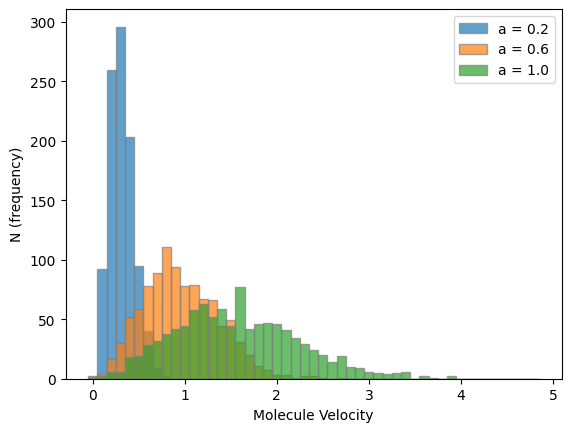

In [ ]:
np.random.randn(123)
fig, ax = pl.subplots()


for a in [0.2, 0.6, 1.0]:
    height1=np.array([])
    height, bins, patch= ax.hist(sp.stats.chi.rvs(df=3, scale=a, size=1000), # could as well be sp.stats.maxwell.rvs(scale=a, size=1000)
          bins=np.arange(0,5,0.1)-0.05, alpha=0.7,
       label="a = %.1f"%a, edgecolor='grey');



# your code to add labels here

#plot shows a histogram
    ax.set_xlabel('Molecule Velocity')
    ax.set_ylabel('Frequency')

pl.legend();


#this is probability density function



Fig. 1: Histogram showing the frequency distribution of velocities, based on the Mawell-Boltzmann distribution.

# 2) knowing that the *scale* parameter $a$  is a function of the temperature  *T*, and that the dependency is to a power 1/2, which is correct:
   **$a \propto \sqrt{T}$**  or **$a \propto \sqrt{1/T}$**?

   (in other words, is the dependency on the root of the temperature or on the inverse root of the temperature ?)


Your answer here:...

The dependency would be on the root of the temperature.




# 3) What is the mean of all three distributions. How does it compare to the most probable molecular speed?
From the wikipedia page of the Chi distribution find the formula of the mean of the Chi distribution. The distribution we are using has a scale parameter *a* in addition to the number of degrees of freedom. The mean scales linearly with this parameter:

$\mu_{\mathrm{MB}, k, a} = a \cdot \mu_{\mathrm{chi}, k}$

Using the scipy function ```sp.special.gamma()``` to  calculate the gamma $\Gamma$ function, and the definition of the mean from the [wikipwdia page of the Chi distribution](https://en.wikipedia.org/wiki/Chi_distribution)
**calculate the mean of all three distributions. Compare it with the mean of the empirical distributions I generated in step 1. How does this mean compare to the most probable molecular speed.**
(and does it look right based on the plots above?)

In [ ]:
# your code here

#a. calculate the mean of MB as defined, from calculating the gamma fn
#and using the mean of chi as defined

#b. and then compare directly to computing the mean of graphs in step 1?

#c. compare with "most probable" molecular speed: the peaks?
#-----
#a.
space=' '

a=[0.2, 0.6, 1.0]

df = 3

gamma=sp.special.gamma(df)

print("Gamma[%.1f]: %.1f" % (df, gamma))
print(space)

chi_mean = ((2)**(1/2))*(sp.special.gamma((df+1)/2))/(sp.special.gamma(df/2))
  #chi_mean is a function of the degree of freedom
print("mean of chi:",chi_mean)
print(space)

mb_mean_array=np.array([])

for a in [0.2, 0.6, 1.0]:
  mb_mean = a * chi_mean
  print("MB mean at a=%.1f" %a, "is %s"%(str(mb_mean)))
  mb_mean_array=np.append(mb_mean_array, mb_mean)
print(space)
#b
#computing mean of graphs in step 1

#calculating according to the plot:
print("Mean by plot:")

for a in [0.2, 0.6, 1.0]:
    # ax.hist(sp.stats.chi.rvs(df=3, scale=a, size=1000), # could as well be sp.stats.maxwell.rvs(scale=a, size=1000)
    #       bins=np.arange(0,5,0.1)-0.05, alpha=0.7,
    #    label="a = %.1f"%a);

    plot_mb_mean=sp.stats.chi.mean(df=3, scale=a)
    print("MB plot mean at a=%.1f: "%a, "%s"%(str(plot_mb_mean)))

print(space)


#c
#most probable: the tallest: appears most frequently in the histogram!

#sp.stats.chi.rvs(df=3, scale=a, size=1000) counted np.mean is the mean in the sample
#while calculating directly from the formula, we're counting mean of the WHOLE distribution





Gamma[3.0]: 2.0
 
mean of chi: 1.595769121605731
 
MB mean at a=0.2 is 0.31915382432114625
MB mean at a=0.6 is 0.9574614729634385
MB mean at a=1.0 is 1.595769121605731
 
Mean by plot:
MB plot mean at a=0.2:  0.3191538243211462
MB plot mean at a=0.6:  0.9574614729634384
MB plot mean at a=1.0:  1.5957691216057308
 


By the results above, we see that we get very similar results from calculating the mean from the formula (as a distribution) and that computed directly from the plot. These values are also close to the most probable velocities seen in the histogram plot, shown as the values that correspond to the highest peaks, at around 0.3, 0.8, 1.7 for a = 0.2, 0.6, and 1.0 respectively.


--------------------------------------------------------------

This really only holds for perfect gasses, which means under 4 assumptions:
- the diameter of the molecules is much smaller than the distance between them
- the collisions between molecules conserve energy
- the molecules do not interact between collisions and are not subject to any other forces (move at constant speed in a straight line)
- the initial position and velocity are random.

# Extra Credit:

can you create a python (2D) simulation where the molecules behave as describe and calculate their speed evolution from an initial speed that is gaussian distributed? (rather hard!!)


In [ ]:
# your code here